## Exploratory Data Analysis (EDA)

### 1. Data Preparation

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [5]:
# Load the dataset
df = pd.read_csv('/Users/dianaterraza/Desktop/portfolio_project/data/Foreign_Exchange_Rates.csv')

In [6]:
df.head()

,DATE,SINGAPORE - SINGAPORE DOLLAR/US$,CHINA - YUAN/US$
0,2000-01-03,1.6563,8.2798
1,2000-01-04,1.6535,8.2799
2,2000-01-05,1.656,8.2798
3,2000-01-06,1.6655,8.2797
4,2000-01-07,1.6625,8.2794


In [7]:
# Check the data types of the columns
print(df.dtypes)

DATE                                object
SINGAPORE - SINGAPORE DOLLAR/US$    object
CHINA - YUAN/US$                    object
dtype: object


In [8]:
# Convert the column 'DATE' into datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Set the DATE column as the index of your DataFrame
df.set_index('DATE', inplace=True)

# Verify that your index is now a DatetimeIndex
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [9]:
# Rename columns for clarity
df.columns = ['SGD_USD', 'CNY_USD']

In [10]:
# Convert the columns SGD_USD and CNY_USD to numeric
df['SGD_USD'] = pd.to_numeric(df['SGD_USD'], errors='coerce')
df['CNY_USD'] = pd.to_numeric(df['CNY_USD'], errors='coerce')

In [11]:
df

,SGD_USD,CNY_USD
DATE,,
2000-01-03,1.6563,8.2798
2000-01-04,1.6535,8.2799
2000-01-05,1.6560,8.2798
2000-01-06,1.6655,8.2797
2000-01-07,1.6625,8.2794
...,...,...
2019-12-25,NaN,NaN
2019-12-26,1.3540,6.9949
2019-12-27,1.3520,6.9954


In [9]:
print(df.dtypes)

SGD_USD    float64
CNY_USD    float64
dtype: object


In [10]:
# Check for missing values
df.isnull().sum()


SGD_USD    198
CNY_USD    197
dtype: int64

In [11]:
#Check for missing values
df[df.isnull().any(axis=1)]

,SGD_USD,CNY_USD
DATE,,
2000-01-17,NaN,NaN
2000-02-21,NaN,NaN
2000-05-29,NaN,NaN
2000-07-04,NaN,NaN
2000-09-04,NaN,NaN
...,...,...
2019-09-02,NaN,NaN
2019-10-14,NaN,NaN
2019-11-11,NaN,NaN


In [12]:
# Fill missing values using forward fill method
df.fillna(method='ffill', inplace=True)



/var/folders/p6/1v6w0vgj3d951b4r8sgj0lgw0000gn/T/ipykernel_14190/2519929843.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [13]:
df.head(100)

,SGD_USD,CNY_USD
DATE,,
2000-01-03,1.6563,8.2798
2000-01-04,1.6535,8.2799
2000-01-05,1.6560,8.2798
2000-01-06,1.6655,8.2797
2000-01-07,1.6625,8.2794
...,...,...
2000-05-15,1.7335,8.2777
2000-05-16,1.7325,8.2772
2000-05-17,1.7340,8.2768


In [14]:
# Get the maximum value from each column
sgd_max = df['SGD_USD'].max()
cny_max = df['CNY_USD'].max()

print(f"Maximum SGD/USD exchange rate: {sgd_max}")
print(f"Maximum CNY/USD exchange rate: {cny_max}")

Maximum SGD/USD exchange rate: 1.854
Maximum CNY/USD exchange rate: 8.28


In [15]:
# 2. Standard Scaling (Z-score normalization)
standard_scaler = StandardScaler()
df_standard = pd.DataFrame(standard_scaler.fit_transform(df[['SGD_USD', 'CNY_USD']]),
                          columns=['SGD_USD', 'CNY_USD'],
                          index=df.index)


In [16]:
df.head()

,SGD_USD,CNY_USD
DATE,,
2000-01-03,1.6563,8.2798
2000-01-04,1.6535,8.2799
2000-01-05,1.6560,8.2798
2000-01-06,1.6655,8.2797
2000-01-07,1.6625,8.2794


### Save the Data cleaning 

Save the dataset in parquet files format for later analysis.

Parquet is ideal because it:
* Preserves data types
* Has efficient compression
* Is faster to read/write than CSV for large datasets
* Works cross-platform and with many languages
* Is widely used in professional data science

In [17]:
# Save the processed data to a CSV file
df.to_csv('processed_data.csv', index=True)


EstandardScaler or minmaxscaler

Hacer el feature engineering, entrenar bajo las mismas escalas o multivariate

### 2. Basic Statistics and Data Overview:

Examine basic statistics to understand the distribution of the data.

In [18]:
# Display first few rows
print(df.head())

# Basic statistics
print(df.describe())

# Check data types
print(df.info())

# Check for any duplicates
print(f"Duplicate entries: {df.index.duplicated().sum()}")

            SGD_USD  CNY_USD
DATE                        
2000-01-03   1.6563   8.2798
2000-01-04   1.6535   8.2799
2000-01-05   1.6560   8.2798
2000-01-06   1.6655   8.2797
2000-01-07   1.6625   8.2794
           SGD_USD      CNY_USD
count  5217.000000  5217.000000
mean      1.480183     7.199286
std       0.188831     0.819876
min       1.200700     6.040200
25%       1.342600     6.475800
50%       1.408400     6.859700
75%       1.678700     8.276500
max       1.854000     8.280000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5217 entries, 2000-01-03 to 2019-12-31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SGD_USD  5217 non-null   float64
 1   CNY_USD  5217 non-null   float64
dtypes: float64(2)
memory usage: 122.3 KB
None
Duplicate entries: 0


### 3. Time Series Visualization
Visualize the exchange rates over time

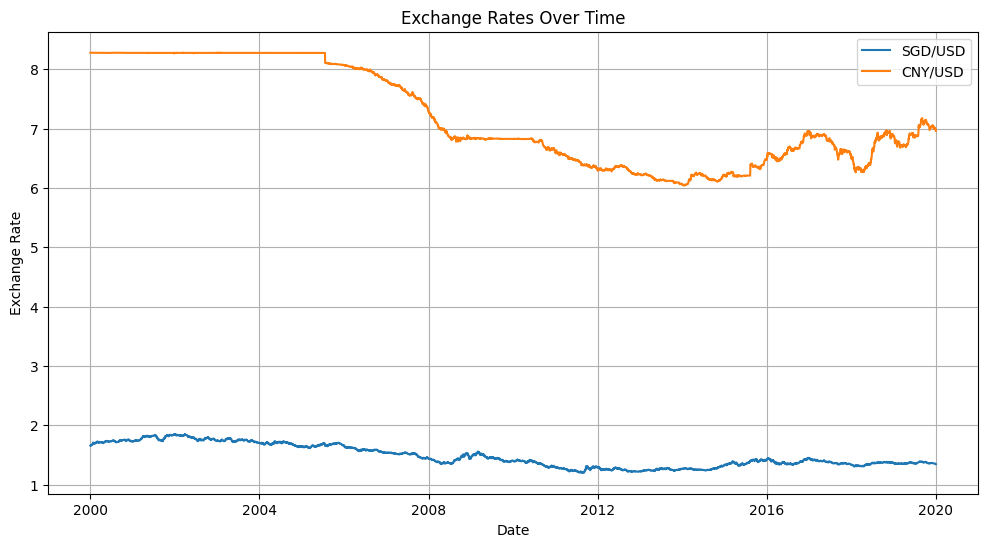

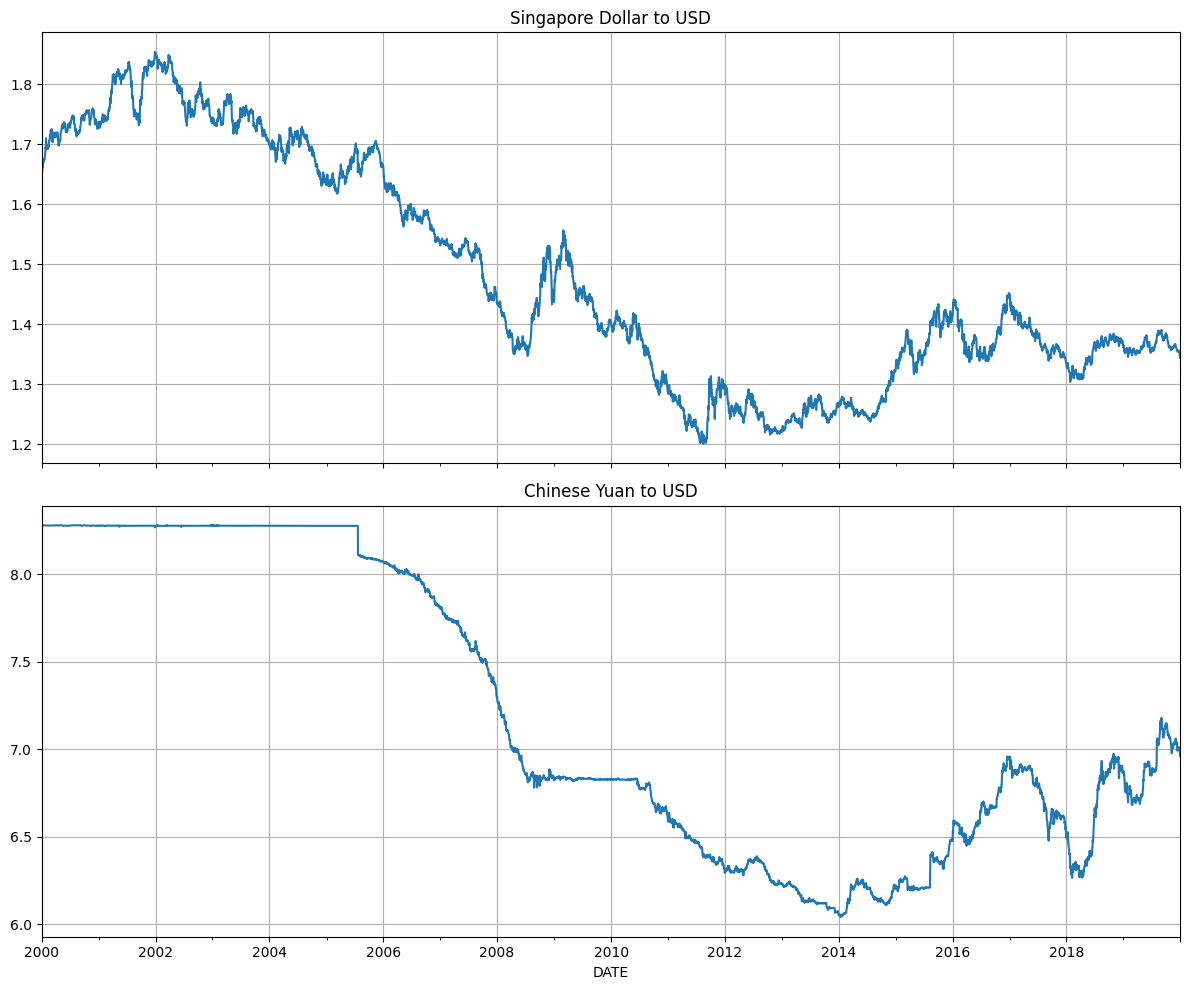

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['SGD_USD'], label='SGD/USD')
plt.plot(df.index, df['CNY_USD'], label='CNY/USD')
plt.title('Exchange Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

# Create subplots for individual currency pairs
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
df['SGD_USD'].plot(ax=axes[0], title='Singapore Dollar to USD')
axes[0].grid(True)
df['CNY_USD'].plot(ax=axes[1], title='Chinese Yuan to USD')
axes[1].grid(True)
plt.tight_layout()
plt.show()

A constant value in a time series plot typically means no variation in the data — it's stuck at one value over a period of time.

**Possible Causes**
1. Fixed Exchange Rate Policy
Some countries (like China in the past) had a fixed exchange rate or currency peg.

That would explain why CNY/USD stays flat (e.g., at 8.28) for several years — because it was artificially controlled by the central bank.

2. Data Entry Error or Placeholder
Maybe that part of the dataset had incomplete historical data, so the system filled it with a default value.

3. Missing Value Forward Fill
If NaNs were forward-filled and the previous value was repeated, it could look flat.

But we will usually notice this with other signs like weekends or gaps before that.

How to confirm the cause:

In [20]:
df['CNY_USD'].value_counts().head(5)

CNY_USD
8.2765    214
8.2768    146
8.2770    145
8.2771    124
8.2767    107
Name: count, dtype: int64

<Axes: xlabel='DATE'>

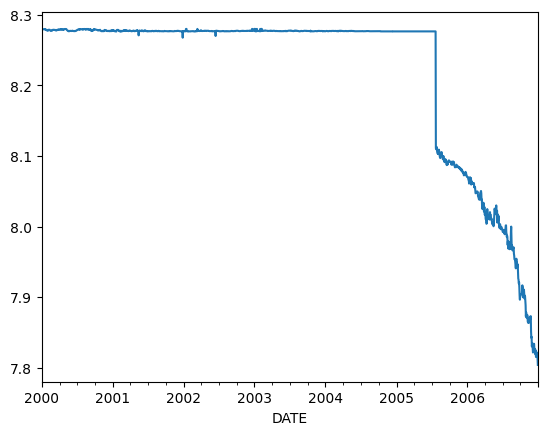

In [21]:
df['2000':'2006']['CNY_USD'].plot()


**Research Historical Forex Policies**

In this case, China maintained a fixed peg to the US dollar until 2005. After that, they began a gradual shift to a managed float system, which aligns perfectly with the change in slope you see after 2005.

So, in this case:

📌 That constant segment in CNY/USD is likely due to China's fixed exchange rate policy before 2005.

### 4. Distribution Analysis
Understand the distribution of exchange rates:

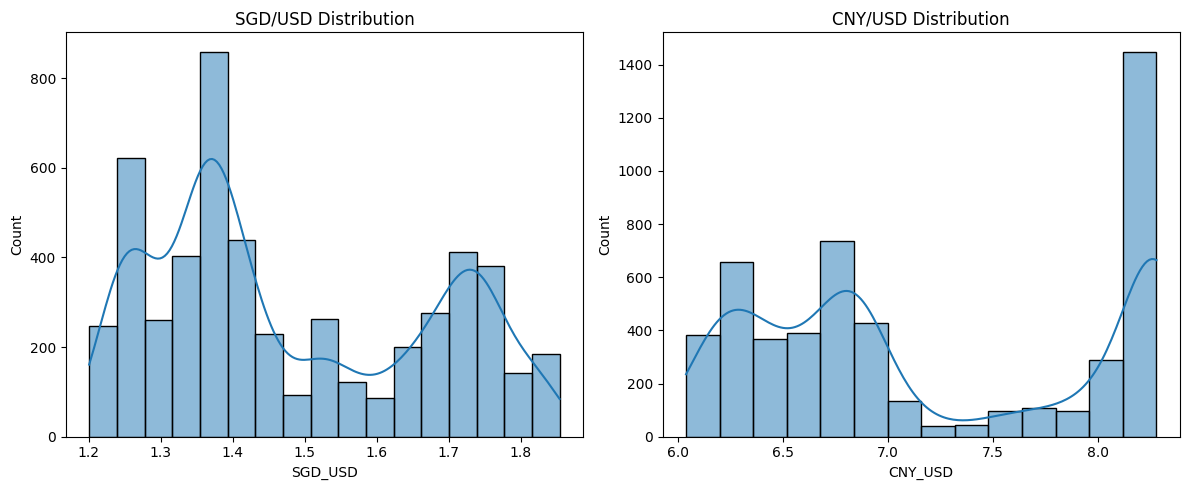

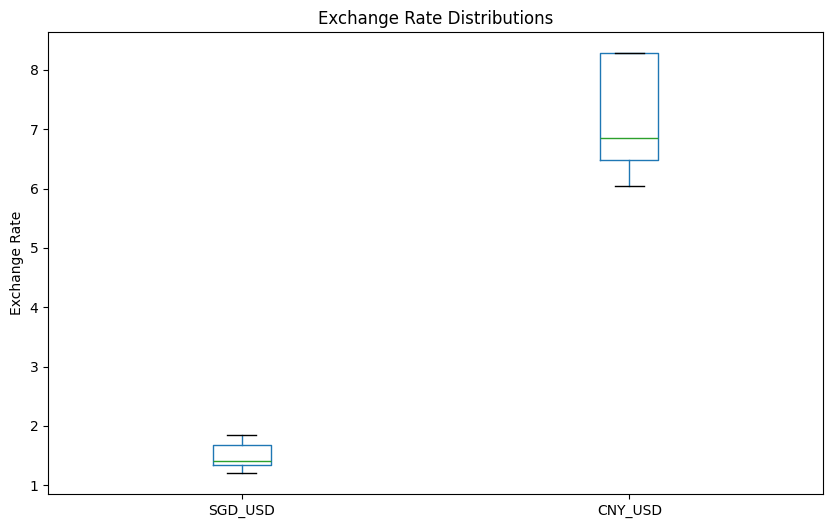

In [22]:
# Histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['SGD_USD'], kde=True, ax=axes[0])
axes[0].set_title('SGD/USD Distribution')
sns.histplot(df['CNY_USD'], kde=True, ax=axes[1])
axes[1].set_title('CNY/USD Distribution')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Exchange Rate Distributions')
plt.ylabel('Exchange Rate')
plt.grid(False)
plt.show()

### 5. Trend Analysis
Analyze trends in the exchange rates:

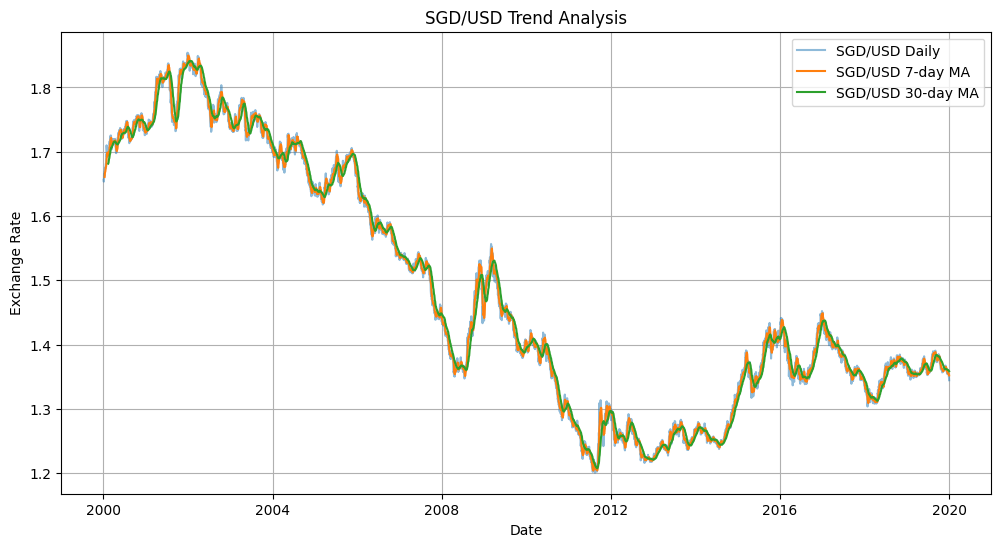

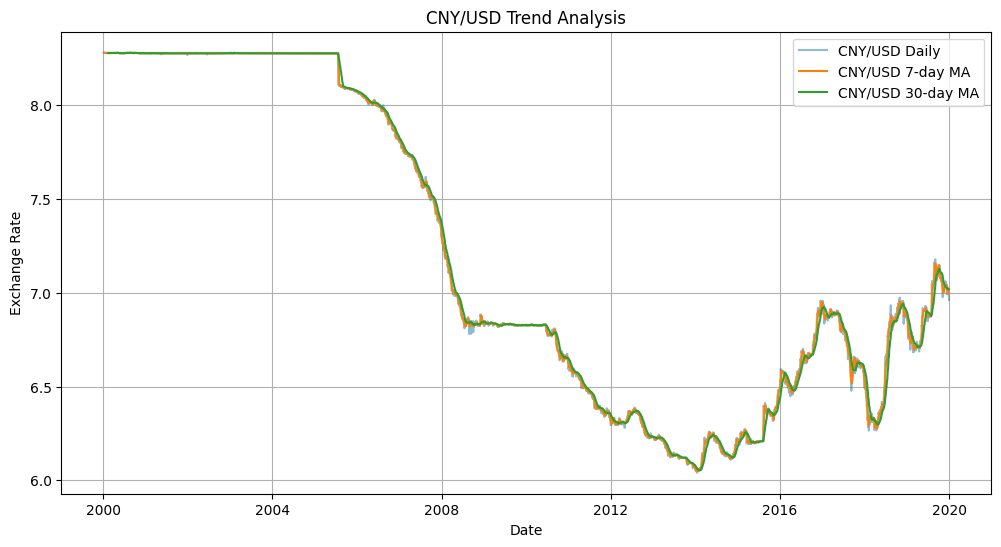

In [23]:
# Calculate rolling averages
df['SGD_USD_7d_MA'] = df['SGD_USD'].rolling(window=7).mean()
df['SGD_USD_30d_MA'] = df['SGD_USD'].rolling(window=30).mean()
df['CNY_USD_7d_MA'] = df['CNY_USD'].rolling(window=7).mean()
df['CNY_USD_30d_MA'] = df['CNY_USD'].rolling(window=30).mean()

# Plot with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['SGD_USD'], alpha=0.5, label='SGD/USD Daily')
plt.plot(df.index, df['SGD_USD_7d_MA'], label='SGD/USD 7-day MA')
plt.plot(df.index, df['SGD_USD_30d_MA'], label='SGD/USD 30-day MA')
plt.title('SGD/USD Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['CNY_USD'], alpha=0.5, label='CNY/USD Daily')
plt.plot(df.index, df['CNY_USD_7d_MA'], label='CNY/USD 7-day MA')
plt.plot(df.index, df['CNY_USD_30d_MA'], label='CNY/USD 30-day MA')
plt.title('CNY/USD Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

### 6. Seasonality Detection
Check for seasonal patterns:

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


/var/folders/p6/1v6w0vgj3d951b4r8sgj0lgw0000gn/T/ipykernel_14190/1162350997.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('M').mean()


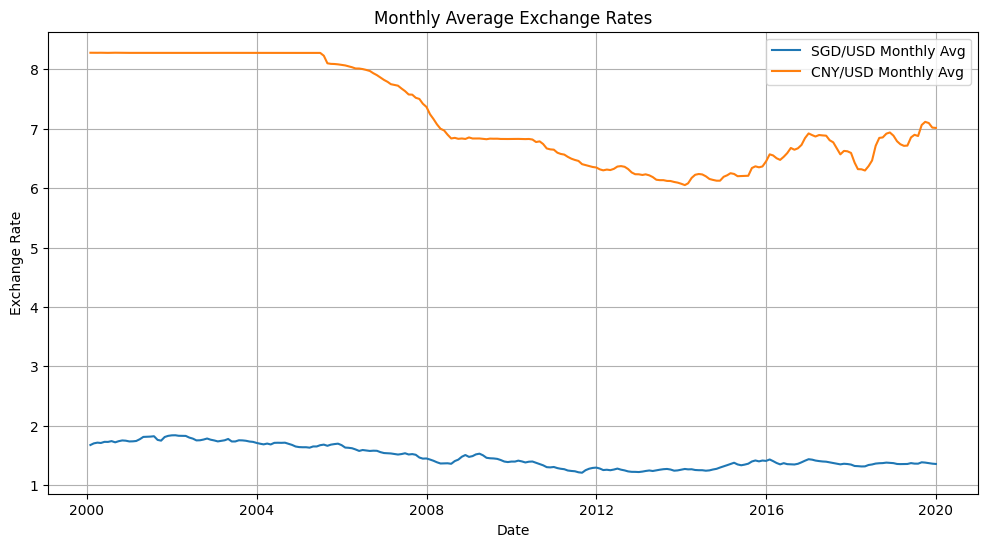

In [24]:
# First, check your current index type
print(type(df.index))

# Convert your index to DatetimeIndex if it's not already
# Assuming you have a date column in your DataFrame
if not isinstance(df.index, pd.DatetimeIndex):
    # If you have a 'DATE' column
    if 'DATE' in df.columns:
        df['DATE'] = pd.to_datetime(df['DATE'])
        df.set_index('DATE', inplace=True)
    # If you don't have a date column but need to create a date index
    else:
        # Create a date range index
        df.index = pd.date_range(start='2020-01-01', periods=len(df), freq='D')
        # Adjust the start date and frequency as needed

# Now check that your index is a DatetimeIndex
print(type(df.index))

# Then proceed with your time series analysis
monthly_df = df.resample('M').mean()

# Plot monthly averages
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df['SGD_USD'], label='SGD/USD Monthly Avg')
plt.plot(monthly_df.index, monthly_df['CNY_USD'], label='CNY/USD Monthly Avg')
plt.title('Monthly Average Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

# Continue with the seasonal decomposition and autocorrelation plots

In [25]:
df.head()

,SGD_USD,CNY_USD,SGD_USD_7d_MA,SGD_USD_30d_MA,CNY_USD_7d_MA,CNY_USD_30d_MA
DATE,,,,,,
2000-01-03,1.6563,8.2798,NaN,NaN,NaN,NaN
2000-01-04,1.6535,8.2799,NaN,NaN,NaN,NaN
2000-01-05,1.6560,8.2798,NaN,NaN,NaN,NaN
2000-01-06,1.6655,8.2797,NaN,NaN,NaN,NaN
2000-01-07,1.6625,8.2794,NaN,NaN,NaN,NaN


### Test for stationarity

In [26]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['SGD_USD'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])  # < 0.05 means stationary

ADF Statistic: -1.0724353325342109
p-value: 0.7259382896136044


### 6. Correlation Analysis 

Examine relationships between the currency pairs:

Correlation between SGD/USD and CNY/USD: 0.9556


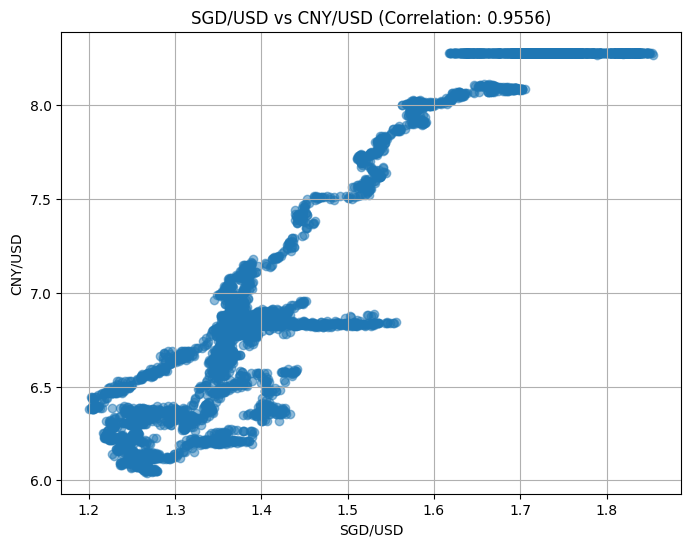

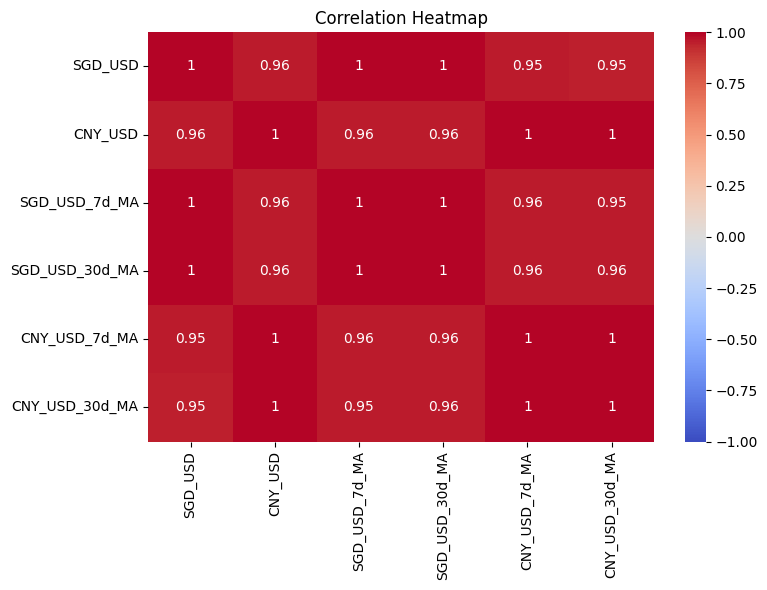

Correlation between SGD/USD and CNY/USD daily changes: 0.2520


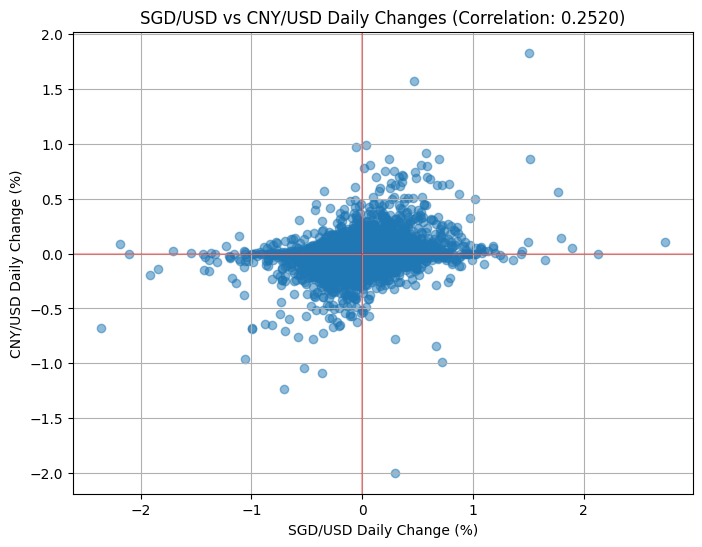

In [27]:
# Correlation coefficient
correlation = df['SGD_USD'].corr(df['CNY_USD'])
print(f"Correlation between SGD/USD and CNY/USD: {correlation:.4f}")

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['SGD_USD'], df['CNY_USD'], alpha=0.5)
plt.title(f'SGD/USD vs CNY/USD (Correlation: {correlation:.4f})')
plt.xlabel('SGD/USD')
plt.ylabel('CNY/USD')
plt.grid(True)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Calculate daily returns/changes
df['SGD_USD_change'] = df['SGD_USD'].pct_change() * 100
df['CNY_USD_change'] = df['CNY_USD'].pct_change() * 100

# Correlation of daily changes
change_correlation = df['SGD_USD_change'].corr(df['CNY_USD_change'])
print(f"Correlation between SGD/USD and CNY/USD daily changes: {change_correlation:.4f}")

# Scatter plot of daily changes
plt.figure(figsize=(8, 6))
plt.scatter(df['SGD_USD_change'], df['CNY_USD_change'], alpha=0.5)
plt.title(f'SGD/USD vs CNY/USD Daily Changes (Correlation: {change_correlation:.4f})')
plt.xlabel('SGD/USD Daily Change (%)')
plt.ylabel('CNY/USD Daily Change (%)')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='-', alpha=0.3)
plt.show()

### 7. Volatility Analysis

Analyze exchange rate volatility:

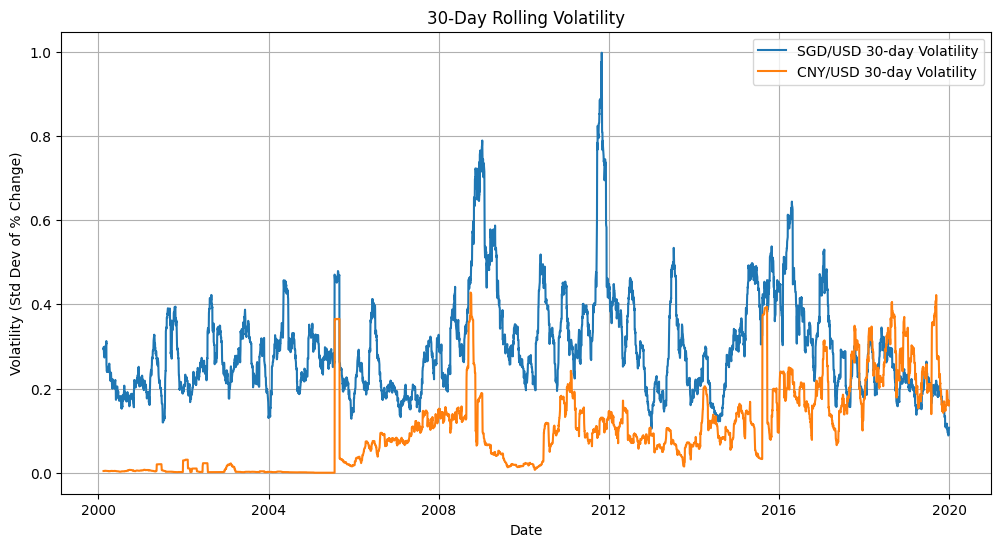

Periods of high SGD/USD volatility:
['2008-10-14', '2008-10-15', '2008-10-16', '2008-10-17', '2008-10-20', '2008-10-21', '2008-10-22', '2008-10-23', '2008-10-24', '2008-10-27', '2008-10-28', '2008-10-29', '2008-10-30', '2008-10-31', '2008-11-03', '2008-11-04', '2008-11-05', '2008-11-06', '2008-11-07', '2008-11-10', '2008-11-11', '2008-11-12', '2008-11-13', '2008-11-14', '2008-11-17', '2008-11-18', '2008-11-19', '2008-11-20', '2008-11-21', '2008-11-24', '2008-11-25', '2008-11-26', '2008-11-27', '2008-11-28', '2008-12-01', '2008-12-02', '2008-12-03', '2008-12-04', '2008-12-05', '2008-12-08', '2008-12-09', '2008-12-10', '2008-12-11', '2008-12-12', '2008-12-15', '2008-12-16', '2008-12-17', '2008-12-18', '2008-12-19', '2008-12-22', '2008-12-23', '2008-12-24', '2008-12-25', '2008-12-26', '2008-12-29', '2008-12-30', '2008-12-31', '2009-01-01', '2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13', '2009-01-14', '2009-01-15', '2009-01-16

In [28]:
# Calculate percentage changes
df['SGD_USD_change'] = df['SGD_USD'].pct_change() * 100
df['CNY_USD_change'] = df['CNY_USD'].pct_change() * 100

# Calculate rolling standard deviation (volatility)
df['SGD_USD_volatility'] = df['SGD_USD_change'].rolling(window=30).std()
df['CNY_USD_volatility'] = df['CNY_USD_change'].rolling(window=30).std()

# Plot volatility over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['SGD_USD_volatility'], label='SGD/USD 30-day Volatility')
plt.plot(df.index, df['CNY_USD_volatility'], label='CNY/USD 30-day Volatility')
plt.title('30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev of % Change)')
plt.legend()
plt.grid(True)
plt.show()

# Identify high volatility periods
high_vol_sgd = df[df['SGD_USD_volatility'] > df['SGD_USD_volatility'].quantile(0.95)]
high_vol_cny = df[df['CNY_USD_volatility'] > df['CNY_USD_volatility'].quantile(0.95)]

print("Periods of high SGD/USD volatility:")
print(high_vol_sgd.index.to_series().dt.strftime('%Y-%m-%d').tolist())

print("Periods of high CNY/USD volatility:")
print(high_vol_cny.index.to_series().dt.strftime('%Y-%m-%d').tolist())